In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00


In [3]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#https://www.youtube.com/watch?v=8FCDpFhd1zk

In [7]:
df = pd.read_csv('/content/drive/MyDrive/oracle/ahp.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.shape)
df.head()

(1652, 1)


,Servers
Date,
2018-06-08,85
2018-06-09,6
2018-06-10,0
2018-06-11,100
2018-06-12,245


<Axes: xlabel='Date'>

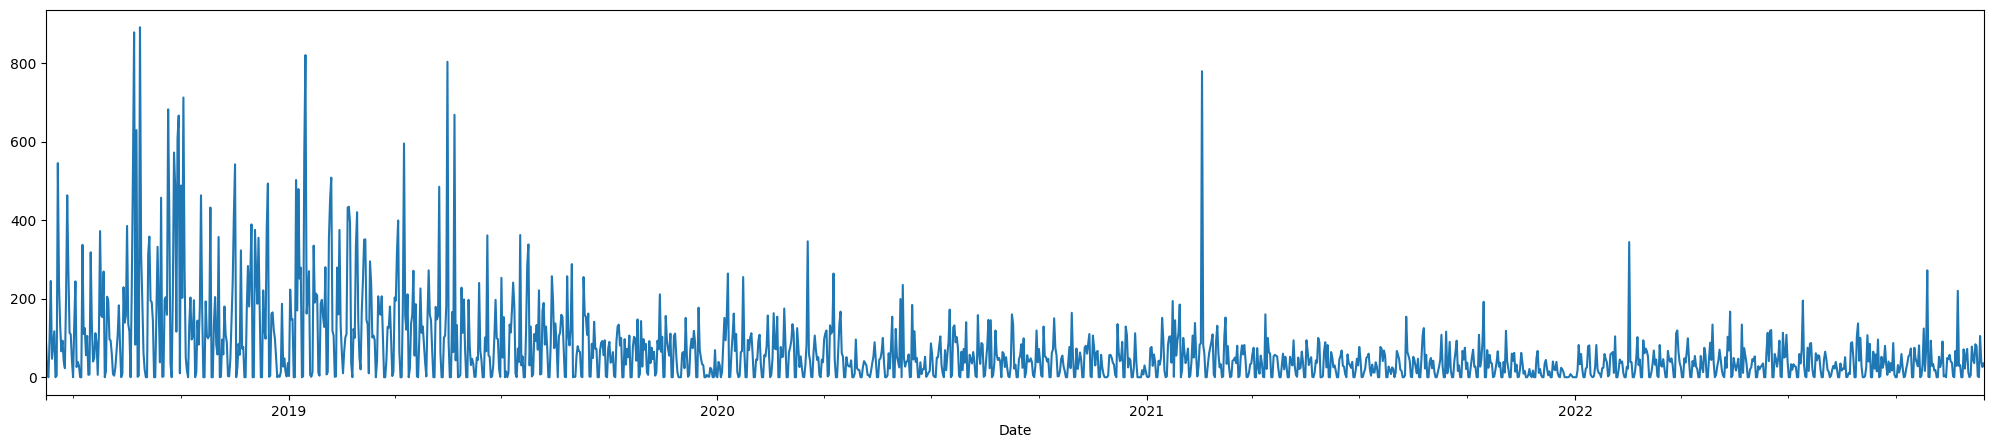

In [8]:
import matplotlib.pyplot as plt
Servers = df['Servers']
Servers.plot(figsize=(25,5))

In [ ]:
# 2021-02-17??? 779

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
ad_test(df['Servers'])

1. ADF :  -3.75645771855307
2. P-Value :  0.003385582487281364
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 1629
5. Critical Values :
	 1% :  -3.4343706472773885
	 5% :  -2.863315883504776
	 10% :  -2.5677154416026884


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Servers'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19546.897, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20370.156, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20164.929, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19629.317, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20368.156, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19558.087, Time=2.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19553.737, Time=1.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19557.251, Time=2.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19281.048, Time=4.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19554.884, Time=2.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19290.165, Time=7.38 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=19280.936, Time=5.04 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=19554.088, Time=2.57 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=19277.996, Time=7.62 sec
 ARIMA(4,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1652
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -9586.660
Date:                Thu, 15 Feb 2024   AIC                          19195.320
Time:                        05:31:35   BIC                          19254.821
Sample:                    06-08-2018   HQIC                         19217.380
                         - 12-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2241      0.334      0.672      0.502      -0.430       0.878
ar.L1          0.7950      0.007    106.597      0.000       0.780       0.810
ar.L2         -1.4130      0.010   -135.255      0.000      -1.433      -1.393
ar.L3          0.7688      0.010     76.177      0.000       0.749       0.789
ar.L4         -0.9783      0.006   -154.152      0.000      -0.991      -0.966
ma.L1         -1.6970      0.014   -118.070      0.000      -1.725      -1.669
ma.L2          2.0594      0.029     71.220      0.000       2.003       2.116
ma.L3         -1.9897      0.034    -57.852      0.000      -2.057      -1.922
ma.L4          1.6138      0.027     59.460      0.000       1.561       1.667
ma.L5         -0.8819      0.013    -65.703      0.000      -0.908      -0.856
sigma2      7282.6814    128.560     56.648      0.000    7030.708    7534.654
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):             31994.13
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             3.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1652, 1)
(1622, 1) (30, 1)


In [ ]:
model=ARIMA(train['Servers'],order=(4,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Servers   No. Observations:                 1622
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -9417.114
Date:                Thu, 15 Feb 2024   AIC                          18854.228
Time:                        05:32:06   BIC                          18908.136
Sample:                    06-08-2018   HQIC                         18874.232
                         - 11-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8005      0.004    178.836      0.000       0.792       0.809
ar.L2         -1.4333      0.005   -273.293      0.000      -1.444      -1.423
ar.L3          0.7913      0.006    137.012      0.000       0.780       0.803
ar.L4         -0.9925      0.004   -275.313      0.000      -1.000      -0.985
ma.L1         -1.7073      0.012   -141.153      0.000      -1.731      -1.684
ma.L2          2.1062      0.023     93.544      0.000       2.062       2.150
ma.L3         -2.0514      0.027    -75.366      0.000      -2.105      -1.998
ma.L4          1.6422      0.022     73.429      0.000       1.598       1.686
ma.L5         -0.8755      0.012    -74.630      0.000      -0.898      -0.852
sigma2      7354.3218    105.332     69.820      0.000    7147.875    7560.769
===================================================================================
Ljung-Box (L1) (Q):                   2.73   Jarque-Bera (JB):             30774.93
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             3.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-11-16    43.659818
2022-11-17    61.630249
2022-11-18    51.477718
2022-11-19     9.842934
2022-11-20     7.173023
2022-11-21    38.841047
2022-11-22    45.150343
2022-11-23    44.020574
2022-11-24    61.780872
2022-11-25    51.180757
2022-11-26    10.084370
2022-11-27     7.553068
2022-11-28    38.414778
2022-11-29    44.750162
2022-11-30    44.372280
2022-12-01    61.921511
2022-12-02    50.895659
2022-12-03    10.330026
2022-12-04     7.920570
2022-12-05    37.991714
2022-12-06    44.362092
2022-12-07    44.714972
2022-12-08    62.052564
2022-12-09    50.622208
2022-12-10    10.579593
2022-12-11     8.275871
2022-12-12    37.572007
2022-12-13    43.985732
2022-12-14    45.048692
2022-12-15    62.174415
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

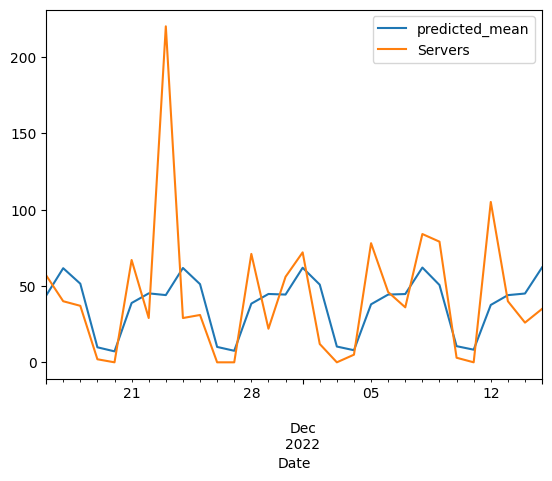

In [ ]:
pred.plot(legend=True)
test['Servers'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Servers'].mean()
rmse=sqrt(mean_squared_error(pred,test['Servers']))
print(rmse)

39.51021486608219


In [ ]:
model2=ARIMA(df['Servers'],order=(4,1,5))
model2=model2.fit()
df.tail()

,Servers
Date,
2022-12-11,0
2022-12-12,105
2022-12-13,40
2022-12-14,26
2022-12-15,35


In [ ]:
#FUTURE

index_future_dates=pd.date_range(start='2022-12-16', end='2023-01-14')
#print(index_future_dates)
pred+model2.predict(start=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-12-16    43.659818
2022-12-17    61.630249
2022-12-18    51.477718
2022-12-19     9.842934
2022-12-20     7.173023
2022-12-21    38.841047
2022-12-22    45.150343
2022-12-23    44.020574
2022-12-24    61.780872
2022-12-25    51.180757
2022-12-26    10.084370
2022-12-27     7.553068
2022-12-28    38.414778
2022-12-29    44.750162
2022-12-30    44.372280
2022-12-31    61.921511
2023-01-01    50.895659
2023-01-02    10.330026
2023-01-03     7.920570
2023-01-04    37.991714
2023-01-05    44.362092
2023-01-06    44.714972
2023-01-07    62.052564
2023-01-08    50.622208
2023-01-09    10.579593
2023-01-10     8.275871
2023-01-11    37.572007
2023-01-12    43.985732
2023-01-13    45.048692
2023-01-14    62.174415
Freq: D, Name: predicted_mean, dtype: float64


<Axes: >

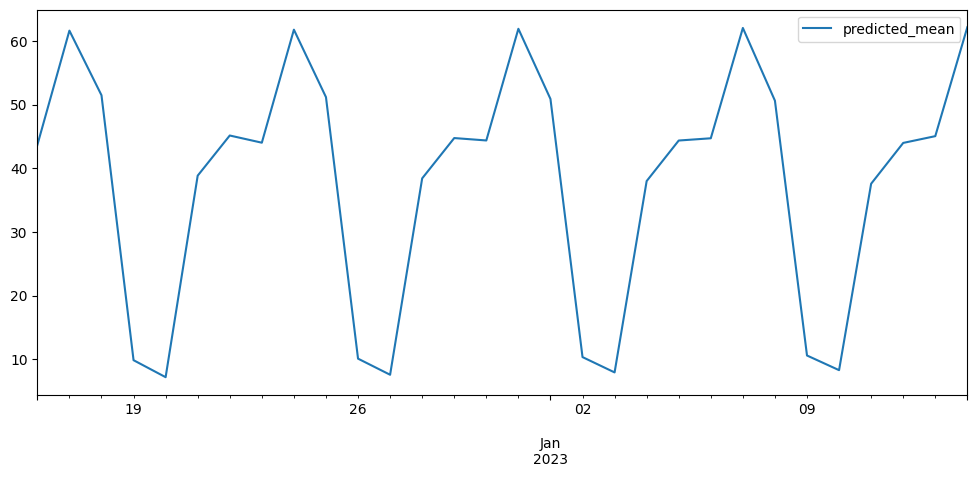

In [ ]:
pred.plot(figsize=(12,5),legend=True)